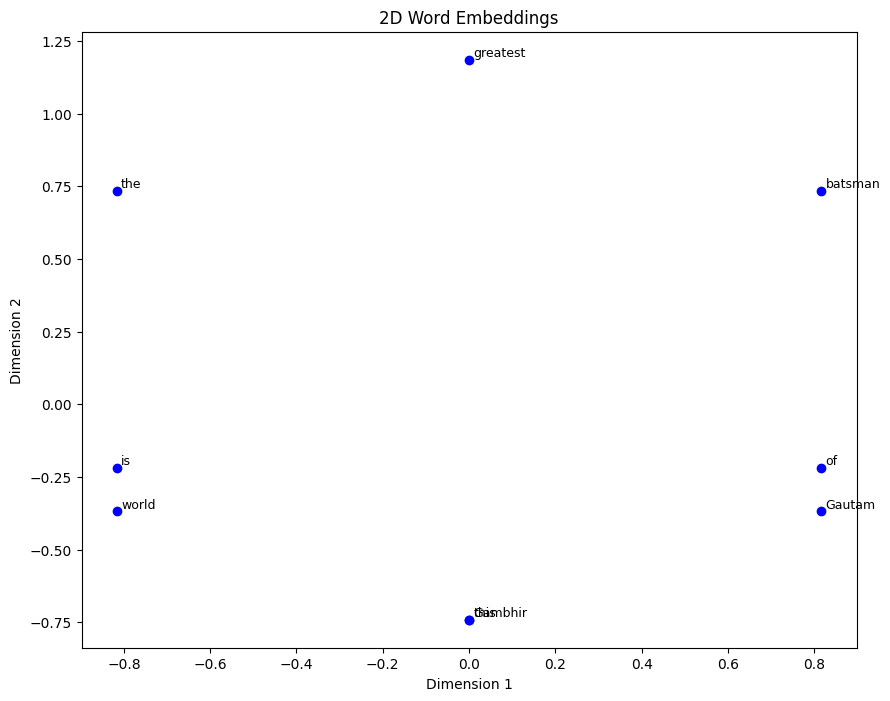

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to work out the distinct words (word types) that occur in the corpus.
def distinct_words(corpus):
    return list(set(corpus))

# Function to construct a co-occurrence matrix for a certain window-size n
def co_occurrence_matrix(corpus, window_size=4):
    words = distinct_words(corpus)
    word_to_index = {word: i for i, word in enumerate(words)}
    num_words = len(words)
    co_matrix = np.zeros((num_words, num_words), dtype=int)

    for i, target_word in enumerate(corpus):
        target_index = word_to_index[target_word]

        start = max(0, i - window_size)
        end = min(len(corpus), i + window_size + 1)

        context_words = [corpus[j] for j in range(start, end) if j != i]
        for context_word in context_words:
            context_index = word_to_index[context_word]
            co_matrix[target_index, context_index] += 1

    return co_matrix, words

# Function to perform dimensionality reduction on the matrix to produce k-dimensional embeddings
def dimensionality_reduction(co_matrix, k=2):
    pca = PCA(n_components=k)
    embeddings = pca.fit_transform(co_matrix)
    return embeddings

# Function to plot a set of 2D vectors in 2D space
def plot_embeddings(embeddings, words):
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(embeddings[i, 0], embeddings[i, 1], marker='o', color='blue')
        plt.text(embeddings[i, 0] + 0.01, embeddings[i, 1] + 0.01, word, fontsize=9)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('2D Word Embeddings')
    plt.show(block=True)

# Load data and create embeddings
corpus = ["Gautam", "Gambhir", "is", "the", "greatest", "batsman", "of", "this", "world"]
co_matrix, words = co_occurrence_matrix(corpus)
embeddings = dimensionality_reduction(co_matrix, k=2)

# Call the plot function
plot_embeddings(embeddings, words)

In [11]:
corpus = ["Gautam", "Gambhir", "is", "the", "greatest", "batsman", "of", "this", "world"]
distinct_words_list = distinct_words(corpus)
print(distinct_words_list)

['Gambhir', 'greatest', 'batsman', 'this', 'Gautam', 'is', 'of', 'world', 'the']


In [12]:
import numpy as np

def distinct_words(corpus):
    return list(set(corpus))

corpus = ["Gautam", "Gambhir", "is", "the", "greatest", "batsman", "of", "this", "world"]

# Call distinct_words to get the list of distinct words
words = distinct_words(corpus)

# Call co_occurrence_matrix to get the co-occurrence matrix
co_matrix, words = co_occurrence_matrix(corpus)

# Print the co-occurrence matrix and words
print("Co-occurrence Matrix:")
print(co_matrix)
print("\nDistinct Words:")
print(words)

Co-occurrence Matrix:
[[0 1 1 0 1 1 0 0 1]
 [1 0 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 1 1 1]
 [0 1 1 0 0 0 1 1 1]
 [1 1 0 0 0 1 0 0 1]
 [1 1 1 0 1 0 1 0 1]
 [0 1 1 1 0 1 0 1 1]
 [0 1 1 1 0 0 1 0 0]
 [1 1 1 1 1 1 1 0 0]]

Distinct Words:
['Gambhir', 'greatest', 'batsman', 'this', 'Gautam', 'is', 'of', 'world', 'the']


Reduced Embeddings:
[[-8.05979881e-15 -7.41503955e-01]
 [ 1.22821808e-14  1.18526188e+00]
 [ 8.16496581e-01  7.34814397e-01]
 [ 1.70148518e-14 -7.41503955e-01]
 [ 8.16496581e-01 -3.68174816e-01]
 [-8.16496581e-01 -2.17766567e-01]
 [ 8.16496581e-01 -2.17766567e-01]
 [-8.16496581e-01 -3.68174816e-01]
 [-8.16496581e-01  7.34814397e-01]]


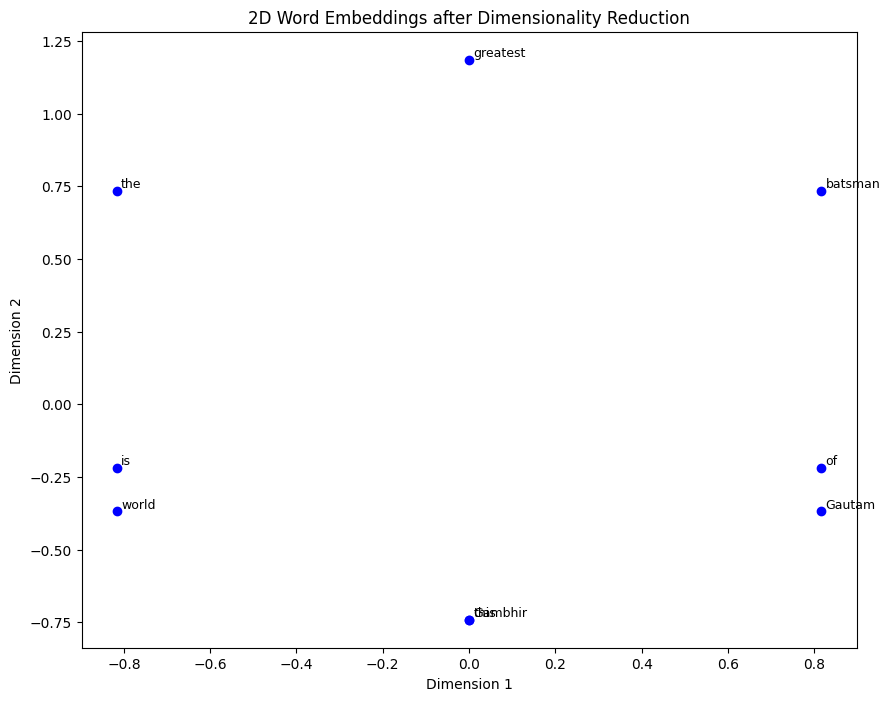

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined distinct_words and co_occurrence_matrix functions

corpus = ["Gautam", "Gambhir", "is", "the", "greatest", "batsman", "of", "this", "world"]

# Get the co-occurrence matrix
co_matrix, words = co_occurrence_matrix(corpus)

# Perform dimensionality reduction using PCA
embeddings = dimensionality_reduction(co_matrix, k=2)

# Print the reduced embeddings
print("Reduced Embeddings:")
print(embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(embeddings[i, 0], embeddings[i, 1], marker='o', color='blue')
    plt.text(embeddings[i, 0] + 0.01, embeddings[i, 1] + 0.01, word, fontsize=9)


plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Word Embeddings after Dimensionality Reduction')
plt.show()

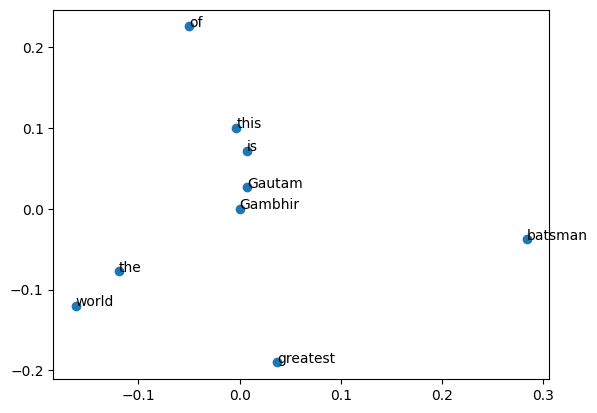

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

corpus = ["Gautam", "Gambhir", "is", "the", "greatest", "batsman", "of", "this", "world"]

# Define function to generate unique words
def distinct_words(corpus):
    return set(corpus)

# Define function to create co-occurrence matrix
def co_occurrence_matrix(corpus):
    distinct_words = set(corpus)
    co_matrix = np.zeros((len(distinct_words), len(distinct_words)))
    for i, word1 in enumerate(distinct_words):
        for j, word2 in enumerate(distinct_words):
            co_matrix[i, j] = corpus.count(word2) if word1 != word2 else 0
    return co_matrix, list(distinct_words)

# Get the co-occurrence matrix
co_matrix, words = co_occurrence_matrix(corpus)

# Normalize the co-occurrence matrix
co_matrix = normalize(co_matrix, axis=1)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings = pca.fit_transform(co_matrix)

# Plot the 2D vectors using matplotlib
import matplotlib.pyplot as plt

plt.scatter(embeddings[:, 0], embeddings[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (embeddings[i, 0], embeddings[i, 1]))
plt.show()